# Assignment 1
## Problem 3

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

import warnings

warnings.filterwarnings("ignore")

5.18.0


### (a) Read the text file, how many classes exist in the dataset? Which class has the most amount of data?

### Read data and plot it based on type of the drink

In [2]:
df = pd.read_csv('Dataset_III.csv')

In [3]:
df['type'].unique()

array(['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water'], dtype=object)

In [4]:
df.groupby('type')['drink'].count()

type
Coffee           173
Energy Drinks    219
Energy Shots      36
Soft Drinks       90
Tea               66
Water             26
Name: drink, dtype: int64

The distribution of Drinks based on their type is presented in the following plot

In [5]:
df.groupby('type')['drink'].count().iplot(kind = 'bar')

We can see that there are 6 types of drinks among our dataset. 
Also, this Coffee and Energy Drinks have the most amount of data

### (b) Plot the histogram of the numerical features. Explain what you understand.

##### Using Seaborn package, we plot histograms of desired features. also, a kde line in plotted above the bar charts to make it more convenient for analysis

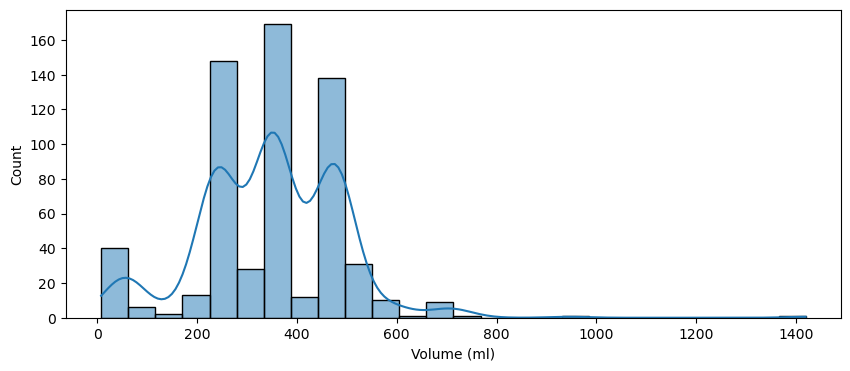

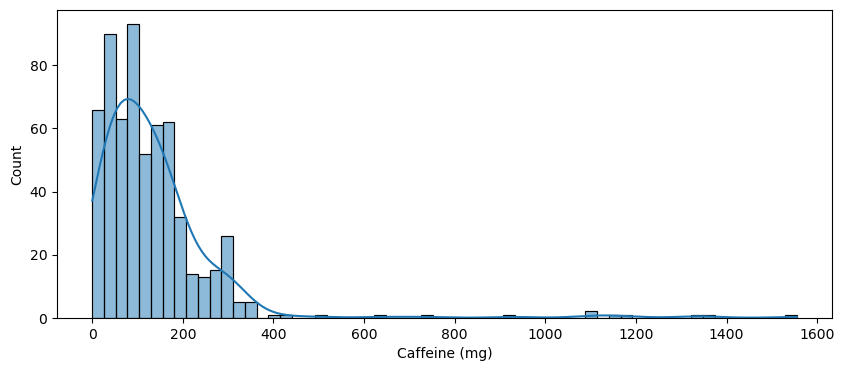

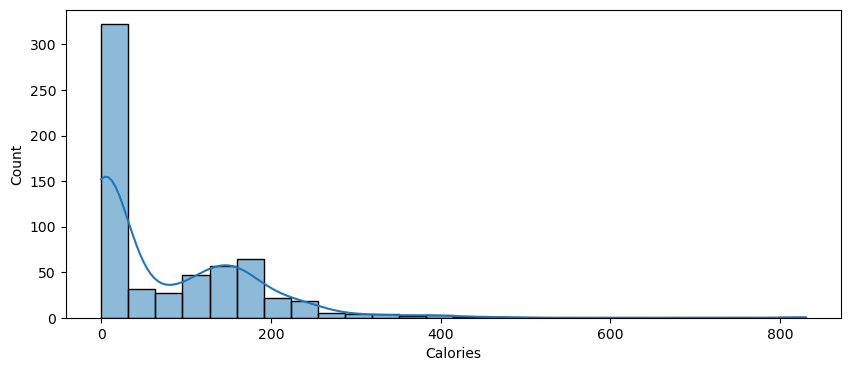

In [6]:
# Plot for 'Volume (ml)'
plt.figure(figsize=(10, 4))
sns.histplot(df['Volume (ml)'], kde=True)
plt.show()

# Plot for 'Caffeine (mg)'
plt.figure(figsize=(10, 4))
sns.histplot(df['Caffeine (mg)'], kde=True)
plt.show()

# Plot for 'Calories'
plt.figure(figsize=(10, 4))
sns.histplot(df['Calories'], kde=True)
plt.show()



By analyzing above diagrams,the following results can be concluded:
* Most of drinks in data set, have a volume in range of 200-450 ml. this indicates that there are fewer samples related to small sized drinks, like shots and similar cups.
* Also, the distribution of drinls based on Caffeine shows that there are very few drinks with high amount of Caffeine, and most of the drinks have a normal amount of 0-200 mg. Meanwhile, a significant number of drinks have very little amount of Cafeine
* Most of the drinks present in dataset have very little amount of calories. this can be due to the fact in the description of dataset which indicates that the value of calories are not defined, because of the variable amount of suger which is used besides the drinks

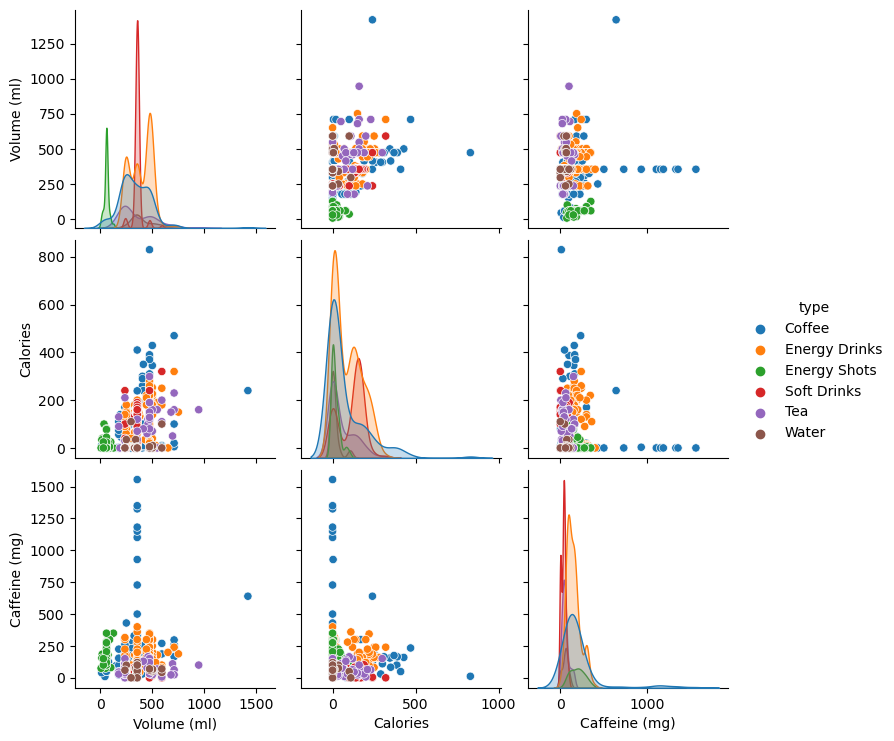

In [7]:
sns.pairplot(df , hue = 'type')

### Scaling feature values to a normalized range

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['type' , 'drink'],axis=1))

StandardScaler()

In [9]:
scaled_features = scaler.transform(df.drop(['type' , 'drink'],axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-2])
df_feat.head()

,drink,Volume (ml),Calories
0,-0.623477,-0.797362,0.916714
1,-0.670834,-0.797362,0.066393
2,-0.670834,0.786216,-0.223489
3,-0.670834,-0.797362,1.902314
4,-0.670834,-0.797362,-0.442511


### (c) Use KNN to fit the appropriate model. For validation, use the F1 score metric.

Using sklearn, first data is divided into test and train and then a KNN model is trained with initial number of neighbors equalls to 1.
This value will be modified later

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['type'], test_size=0.2)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Using the trained model, output values of test data is predicted.
Next, we can see the confusion matrix which shows True and False predictions based on each type
finally, some metrics are calculated

In [12]:
pred = knn.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[19  6  0  0  5  0]
 [ 7 30  0  0  3  2]
 [ 0  0  5  0  0  0]
 [ 1  3  0 18  2  0]
 [ 4  3  0  0  8  0]
 [ 1  0  0  1  3  1]]


In [14]:
print(classification_report(y_test,pred))

               precision    recall  f1-score   support

       Coffee       0.59      0.63      0.61        30
Energy Drinks       0.71      0.71      0.71        42
 Energy Shots       1.00      1.00      1.00         5
  Soft Drinks       0.95      0.75      0.84        24
          Tea       0.38      0.53      0.44        15
        Water       0.33      0.17      0.22         6

     accuracy                           0.66       122
    macro avg       0.66      0.63      0.64       122
 weighted avg       0.68      0.66      0.67       122



### (d) Find the best K.

To optimize the model, we must define the number of neighbors. a convonient method for this is utilizing Elbow Methos. in this method, an error rate is calculated for different number of neighbors. later using this plot, we can choose the best value of K

In [15]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

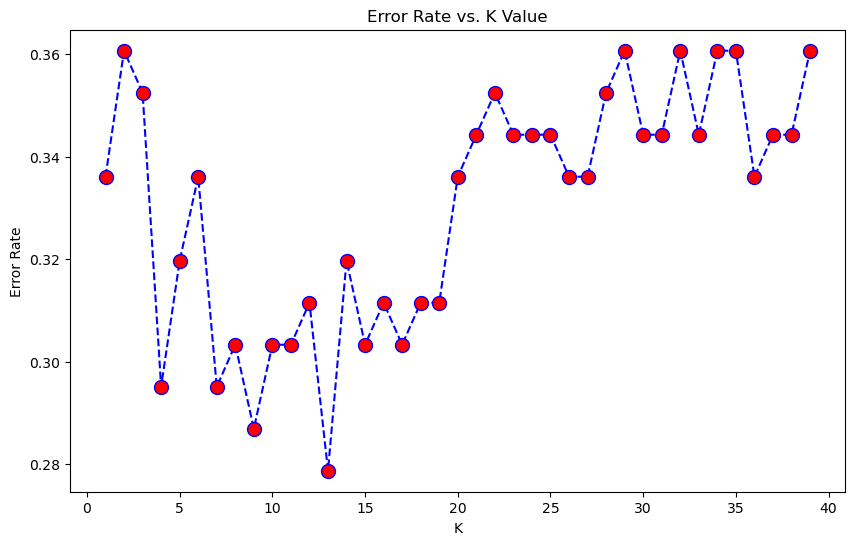

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

As shown on the diagram, the minimum Error Rate is 15. so we set number 15 as our number of neighbors 

In [17]:
# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
confusion_matrix(y_test,pred)
print('\n')
print(classification_report(y_test,pred))

WITH K=15




               precision    recall  f1-score   support

       Coffee       0.71      0.57      0.63        30
Energy Drinks       0.63      0.86      0.73        42
 Energy Shots       1.00      0.80      0.89         5
  Soft Drinks       0.87      0.83      0.85        24
          Tea       0.62      0.53      0.57        15
        Water       0.00      0.00      0.00         6

     accuracy                           0.70       122
    macro avg       0.64      0.60      0.61       122
 weighted avg       0.68      0.70      0.68       122



Thank you